# Name - Arnav Kumar
# Internship@ CodeAlpha
# Task 2 - Stock Price Prediction Using LSTM

## -------------------------

## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime
import yfinance as yf

## Loading Dataset Directly From yfinance

In [67]:
stock_symbol = 'AAPL'
df = yf.download(stock_symbol, start='2015-01-01', end='2024-01-01')
if df.empty:
    raise ValueError("The DataFrame is empty. Please check your data source.")

[*********************100%%**********************]  1 of 1 completed


In [68]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402168,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714725,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716957,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049522,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973558,237458000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2264 non-null   float64
 1   High       2264 non-null   float64
 2   Low        2264 non-null   float64
 3   Close      2264 non-null   float64
 4   Adj Close  2264 non-null   float64
 5   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB


In [70]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,83.956509,84.876609,83.092088,84.026440,81.947537,1.237607e+08
std,55.979856,56.611354,55.396020,56.034699,56.371166,6.818458e+07
min,22.500000,22.917500,22.367500,22.584999,20.744026,2.404830e+07
25%,35.452501,35.651249,35.243749,35.439376,33.037567,7.831732e+07
50%,54.039999,54.740000,53.270000,53.868752,51.568733,1.056556e+08
75%,141.444996,143.274998,139.239998,141.710003,139.961834,1.486811e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,6.488252e+08


In [71]:
df = df[['Close']].dropna()
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

### the training data set

In [72]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [73]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

###  Reshaping input to be [samples, time steps, features] for LSTM

In [74]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM MODEL

In [75]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Vaidurya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
#Training the model
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - loss: 0.0241
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 3.4434e-04
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 3.2444e-04
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 3.5623e-04
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 3.0789e-04
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.1014e-04
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 3.0888e-04
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.4470e-04
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.7109e-04
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.4229e-04


In [77]:
# Predicting and Transforming back to original scale
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


## Prepare to Visualise

In [78]:
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2):len(scaled_data), :] = test_predict
# Ensure arrays are not empty
if np.all(np.isnan(train_predict_plot)) or np.all(np.isnan(test_predict_plot)):
    raise ValueError("Prediction arrays contain only NaNs. Check your predictions.")

## Visualising The Results

In [79]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

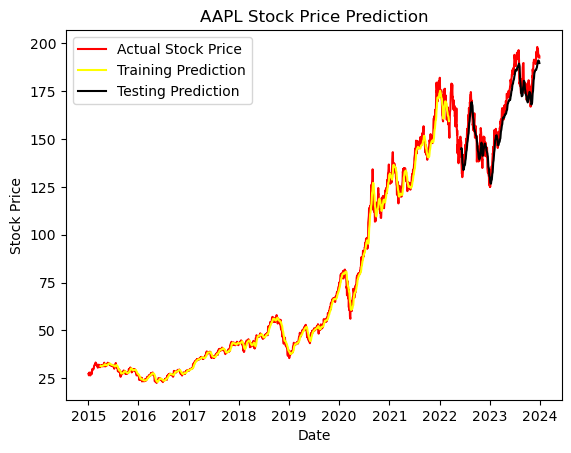

In [99]:
plt.plot(df.index, df['Close'], label='Actual Stock Price', color='red')
plt.plot(df.index, train_predict_plot, label='Training Prediction', color='yellow')
plt.plot(df.index, test_predict_plot, label='Testing Prediction', color='black')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()